#SMS Spam Classification


This project is a Python implementation of an sms spam classification system. The goal is to build a model that can accurately classify emails as either spam or not spam.The project uses the scikit-learn library to train and evaluate the model.


#Import libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay


#Load the dataset

In [2]:
df = pd.read_csv("spam.csv")
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."



#Split the data into train and test set

In [3]:
X = df.iloc[:, 1:2]
y = df.iloc[:, 0:1]


#Visualize the class distribution

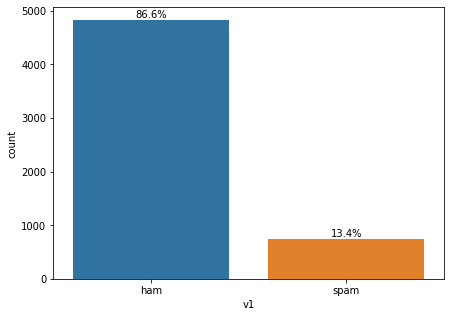

In [4]:
fig, ax = plt.subplots(figsize=(7, 5))
sns.countplot(x="v1", data=df)
   
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/len(X))
    x_countplot = p.get_x() + p.get_width()/2
    y_countplot = p.get_height()+ 50
    ax.annotate(percentage, (x_countplot, y_countplot), ha='center')
plt.show()


#We can see that there's huge differences in class distribution, where the majority of data is ham (86.6%) and only 13.4% are spam

In [5]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\charu\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [7]:
df['num_characters']=df['v1'].apply(len)
df.head()

,v1,v2,num_characters
0,ham,"Go until jurong point, crazy.. Available only ...",3
1,ham,Ok lar... Joking wif u oni...,3
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,4
3,ham,U dun say so early hor... U c already then say...,3
4,ham,"Nah I don't think he goes to usf, he lives aro...",3


In [8]:
from nltk.tokenize import word_tokenize
df['v1'].apply(lambda x: nltk.word_tokenize(x))

0        [ham]
1        [ham]
2       [spam]
3        [ham]
4        [ham]
         ...  
5567    [spam]
5568     [ham]
5569     [ham]
5570     [ham]
5571     [ham]
Name: v1, Length: 5572, dtype: object

#For a number of words and sentence 

In [9]:
df['num_words']=df['v1'].apply(lambda x:len(nltk.word_tokenize(x)))
df.sample(5)

,v1,v2,num_characters,num_words
1765,ham,Hi this is yijue... It's regarding the 3230 te...,3,1
831,ham,Hi mate its RV did u hav a nice hol just a mes...,3,1
4199,ham,I will come tomorrow di,3,1
2384,ham,"Sorry, I'll call later",3,1
4816,ham,Me too. Mark is taking forever to pick up my p...,3,1


In [11]:
df['num_sentences']=df['v1'].apply(lambda x: len(nltk.sent_tokenize(x)))
df.sample(5)

,v1,v2,num_characters,num_words,num_sentences
1374,spam,"500 New Mobiles from 2004, MUST GO! Txt: NOKIA...",4,1,1
3458,spam,Not heard from U4 a while. Call me now am here...,4,1,1
238,ham,"New Theory: Argument wins d SITUATION, but los...",3,1,1
3331,ham,Ok... The theory test? when are Ì_ going to bo...,3,1,1
2415,ham,Huh means computational science... Y they like...,3,1,1


#Split the training and testing set

In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    X.values.ravel(), 
    y.values.ravel(), 
    test_size=0.20, 
    random_state=42)

#Feature Extraction

In [19]:
count_vectorizer = CountVectorizer()
tfidf_vectorizer = TfidfVectorizer()

#Model Training

Create the pipeline using Count Vectorizer

In [20]:
clf_method = KNeighborsClassifier()

clf_count_vectorizer = Pipeline([
     ('vectorizer', count_vectorizer),
     ('classifier', clf_method)
 ])

clf_count_vectorizer.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('classifier', KNeighborsClassifier())])

In [21]:
clf_tfidf_vectorizer = Pipeline([
     ('vectorizer', tfidf_vectorizer),
     ('classifier', clf_method)
 ])

clf_tfidf_vectorizer.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier', KNeighborsClassifier())])

In [22]:
y_train_pred_cvect = clf_count_vectorizer.predict(X_train)
y_train_pred_tfidf_vect = clf_tfidf_vectorizer.predict(X_train)

print(f"Train Accuracy using Count Vectorizer: {accuracy_score(y_train, y_train_pred_cvect):.3f}")
print(f"Train Accuracy using TF-IDF Vectorizer: {accuracy_score(y_train, y_train_pred_tfidf_vect):.3f}")

Train Accuracy using Count Vectorizer: 0.973
Train Accuracy using TF-IDF Vectorizer: 0.920


In [23]:
print(classification_report(y_train, y_train_pred_cvect))

              precision    recall  f1-score   support

         ham       0.97      1.00      0.98      3860
        spam       0.99      0.81      0.89       597

    accuracy                           0.97      4457
   macro avg       0.98      0.90      0.94      4457
weighted avg       0.97      0.97      0.97      4457



In [24]:
print(classification_report(y_train, y_train_pred_tfidf_vect))

              precision    recall  f1-score   support

         ham       0.92      1.00      0.96      3860
        spam       1.00      0.41      0.58       597

    accuracy                           0.92      4457
   macro avg       0.96      0.70      0.77      4457
weighted avg       0.93      0.92      0.91      4457



#Model Evaluation

In [25]:
y_test_pred_cvect = clf_count_vectorizer.predict(X_test)
y_test_pred_tfidf_vect = clf_tfidf_vectorizer.predict(X_test)

print(f"Test Accuracy using Count Vectorizer: {accuracy_score(y_test, y_test_pred_cvect):.3f}")
print(f"Test Accuracy using TF-IDF Vectorizer: {accuracy_score(y_test, y_test_pred_tfidf_vect):.3f}")

Test Accuracy using Count Vectorizer: 0.968
Test Accuracy using TF-IDF Vectorizer: 0.916


In [26]:
print(classification_report(y_test, y_test_pred_cvect))

              precision    recall  f1-score   support

         ham       0.97      1.00      0.98       965
        spam       0.97      0.78      0.87       150

    accuracy                           0.97      1115
   macro avg       0.97      0.89      0.92      1115
weighted avg       0.97      0.97      0.97      1115



In [27]:
print(classification_report(y_test, y_test_pred_tfidf_vect))

              precision    recall  f1-score   support

         ham       0.91      1.00      0.95       965
        spam       1.00      0.37      0.54       150

    accuracy                           0.92      1115
   macro avg       0.96      0.69      0.75      1115
weighted avg       0.92      0.92      0.90      1115



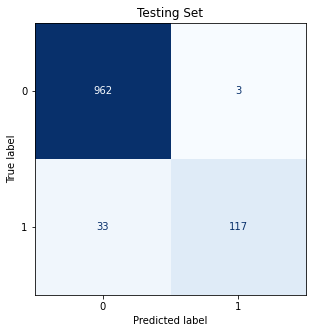

In [28]:
conf_mat_train = ConfusionMatrixDisplay(confusion_matrix(y_test, y_test_pred_cvect))

fig, ax = plt.subplots(figsize=(5, 5))
ax.set_title('Testing Set')
conf_mat_train.plot(cmap=plt.cm.Blues, ax=ax, colorbar=False);

The CountVectorizer with KNN classifier notably outperforms TF-IDF Vectorizer with KNN in accuracy. With 86.6% 'ham' and 13.4% 'spam' data distribution, CountVectorizer achieves 97.3% and 96.8% accuracy on training and test sets respectively, surpassing TF-IDF Vectorizer's 92.0% and 91.6%. 